## % Distribution of Occupations Among Female Workers - PLFS

In this notebook, I am going to wrangle the PLFS dataset to find the percentage distribution of occupations among female workers in India. The dataset contains

In [99]:
# importing required packages 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [127]:
# loading the raw dataset
df = pd.read_stata("extracted\cperv.dta")

In [128]:
df.shape

(424926, 140)

There are 424926 rows and 140 columns. 

In [4]:
df.head()

,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,...,b131,b132,b133,b134,b135,b136,b137,b138,b139,b140
0,P3,CFVP2,104,Q3,V1,1,28,02,281,01,...,0,11,01,611,0,12000,1,2,1293611,4
1,P3,CFVP2,104,Q3,V1,1,28,02,281,01,...,0,31,84,335,5000,0,1,2,1293611,4
2,P3,CFVP2,104,Q3,V1,1,28,02,281,01,...,0,21,01,611,0,0,1,2,1293611,4
3,P3,CFVP2,104,Q3,V1,1,28,02,281,01,...,0,31,84,335,12000,0,1,2,1293611,4
4,P3,CFVP2,104,Q3,V1,1,28,02,281,01,...,0,11,01,611,0,15000,1,2,1293611,4


I will rename the columns. For this purpose, I am going to create a dictionary of column names. Corresponding column names are given in the survey file.

In [5]:
old_cols = list(df.columns)

In [6]:
new_cols = [
    "Panel", "File Identification", "Schedule", "Quarter", "Visit", "Sector", "State/Ut Code", "District Code", "NSS-Region", "Stratum", 
    "Sub-Stratum", "Sub-Sample", "Food Sub-Region", "FSU", "Sample Sg/Sb No.", "Second Stage Stratum No.", "Sample Household Number", "Person Serial No.", "Relationship To Head", "Sex",
    "Age", "Marital Status", "General Education Level", "Technical Education Level", "No. of years in Formal Education", "Status of Current Attendance in Educational Institution", 
    "Whether received any Vocational/Technical Training", "Whether Training completed during last 365 Days", "Field Of Training", "Duration Of Training", "Type Of Training", 
    "Source Of Funding The Training", "Status Code", "Industry Code (NIC)", "occup_code", "Whether Engaged In Any Work In Subsidiary Capacity", "(Principal) location Of Workplace Code", 
    "(Principal) Enterprise Type Code", "(Principal) No. Of Workers In The Enterprise", "(Principal) Type Of Job Contract", "(Principal) Eligible Of Paid Leave", "(Principal) Social Security Benefits", 
    "(Principal) Usage of product of the economic activity", "Status Code", "Industry Code (NIC)", "Occupation Code (NCO)", "(Subsidiary) location Of Workplace Code", 
    "(Subsidiary) Enterprise Type Code", "(Subsidiary) No. Of Workers In The Enterprise", "(Subsidiary) Type Of Job Contract", "(Subsidiary) Eligible Of Paid Leave", "(Subsidiary) Social Security Benefits", 
    "(Subsidiary) Usage of product of the economic activity", "Ever Worked Prior to last 365 days", "Duration of engagement in the economic activity in usual Principal Activity Status", 
    "Duration of engagement in the economic activity in Subsidiary Activity Status", "Efforts undertaken to search work", "Duration of spell of Unemployment", "Whether Ever Worked", 
    "Reason for not working in last 365 days", "Main reason for being in Principal activity status (91 to 97)", "Status Code for activity 1", "Industry Code (NIC) for activity 1", 
    "hours actually worked for activity 1 on 7th day", "wage earning for activity 1 on 7th day", "Status Code for activity 2", "Industry Code (NIC) for activity 2", 
    "hours actually worked for activity 2 on 7th day", "wage earning for activity 2 on 7th day", "total hours actually worked on 7th day", "hours available for additional worked on 7th day", 
    "Status Code for activity 1", "Industry Code (NIC) for activity 1", "hours actually worked for activity 1 on 6th day", "wage earning for activity 1 on 7th day", 
    "Status Code for activity 2", "Industry Code (NIC) for activity 2", "hours actually worked for activity 2 on 6th day", "wage earning for activity 2 on 6th day", 
    "total hours actually worked on 6th day", "hours available for additional worked on 6th day", "Status Code for activity 1", "Industry Code (NIC) for activity 1", 
    "hours actually worked for activity 1 on 5th day", "wage earning for activity 1 on 5th day", "Status Code for activity 2", "Industry Code (NIC) for activity 2", 
    "hours actually worked for activity 2 on 5th day", "wage earning for activity 2 on 5th day", "total hours actually worked on 5th day", "hours available for additional worked on 5th day", 
    "Status Code for activity 1", "Industry Code (NIC) for activity 1", "hours actually worked for activity 1 on 4th day", "wage earning for activity 1 on 4th day", 
    "Status Code for activity 2", "Industry Code (NIC) for activity 2", "hours actually worked for activity 2 on 4th day", "wage earning for activity 2 on 4th day", 
    "total hours actually worked on 4th day", "hours available for additional worked on 4th day", "Status Code for activity 1", "Industry Code (NIC) for activity 1", 
    "hours actually worked for activity 1 on 3rd day", "wage earning for activity 1 on 3rd day", "Status Code for activity 2", "Industry Code (NIC) for activity 2", 
    "hours actually worked for activity 2 on 3rd day", "wage earning for activity 2 on 3rd day", "total hours actually worked on 3rd day", "hours available for additional worked on 3rd day", 
    "Status Code for activity 1", "Industry Code (NIC) for activity 1", "hours actually worked for activity 1 on 2nd day", "wage earning for activity 1 on 2nd day", 
    "Status Code for activity 2", "Industry Code (NIC) for activity 2", "hours actually worked for activity 2 on 2nd day", "wage earning for activity 2 on 2nd day", 
    "total hours actually worked on 2nd day", "hours available for additional worked on 2nd day", "Status Code for activity 1", "Industry Code (NIC) for activity 1", 
    "hours actually worked for activity 1 on 1st day", "wage earning for activity 1 on 1st day", "Status Code for activity 2", "Industry Code (NIC) for activity 2", 
    "hours actually worked for activity 2 on 1st day", "wage earning for activity 2 on 1st day", "total hours actually worked on 1st day", "hours available for additional worked on 1st day", 
    "Current Weekly Status (CWS)", "Industry Code (CWS)", "Occupation Code (CWS)", "Earnings For Regular Salaried/Wage Activity", "Earnings For Self Employed", 
    "Ns count for sector x stratum x substratum x sub-sample", "Ns count for sector x stratum x substratum", "Sub-sample wise Multiplier", 
    "Occurrence of FSUs in State x Sector x Stratum x SubStratum in 4 Quarters"
]


In [7]:
col_dict = dict(zip(old_cols, new_cols))

In [41]:
col_dict

{'b1': 'Panel',
 'b2': 'File Identification',
 'b3': 'Schedule',
 'b4': 'Quarter',
 'b5': 'Visit',
 'b6': 'Sector',
 'b7': 'State/Ut Code',
 'b8': 'District Code',
 'b9': 'NSS-Region',
 'b10': 'Stratum',
 'b11': 'Sub-Stratum',
 'b12': 'Sub-Sample',
 'b13': 'Food Sub-Region',
 'b14': 'FSU',
 'b15': 'Sample Sg/Sb No.',
 'b16': 'Second Stage Stratum No.',
 'b17': 'Sample Household Number',
 'b18': 'Person Serial No.',
 'b19': 'Relationship To Head',
 'b20': 'Sex',
 'b21': 'Age',
 'b22': 'Marital Status',
 'b23': 'General Education Level',
 'b24': 'Technical Education Level',
 'b25': 'No. of years in Formal Education',
 'b26': 'Status of Current Attendance in Educational Institution',
 'b27': 'Whether received any Vocational/Technical Training',
 'b28': 'Whether Training completed during last 365 Days',
 'b29': 'Field Of Training',
 'b30': 'Duration Of Training',
 'b31': 'Type Of Training',
 'b32': 'Source Of Funding The Training',
 'b33': 'Status Code',
 'b34': 'Industry Code (NIC)',
 'b3

In [124]:
# renaming the columns
df = df.rename(columns = col_dict)

Now there is a column named "occup code" that records the occupation of the worker. I want the corresponding occupation titles.  

In [9]:
# fetching unique occupation codes in the data
df.occup_code.unique()

array(['611', '335', '931', '', '711', '921', '233', '514', '312', '723',
       '753', '411', '832', '512', '911', '622', '812', '322', '112',
       '713', '612', '742', '522', '325', '721', '524', '741', '421',
       '613', '833', '263', '251', '752', '712', '531', '412', '521',
       '141', '122', '231', '331', '332', '751', '432', '952', '241',
       '815', '313', '111', '222', '333', '234', '912', '422', '341',
       '932', '413', '933', '311', '541', '142', '131', '961', '441',
       '121', '813', '352', '235', '516', '731', '632', '431', '818',
       '224', '816', '515', '511', '226', '523', '834', '962', '132',
       '513', '732', '334', '243', '351', '343', '252', '143', '242',
       '221', '621', '631', '633', '214', '532', '225', '722', '754',
       '315', '814', '321', '261', '817', '324', '835', '811', '831',
       '941', '223', '213', '265', '215', '821', '216', '133', '342',
       '951', '262', '134', '314', '211', '634', '323', '232', '264',
       '212'], d

In [12]:
# dictionary of occupations 
categories = {
    1: "Managers",
    2: "Professionals",
    3: "Technicians & Associate Professionals",
    4: "Clerks",
    5: "Service and Sales Workers",
    6: "Skilled Agricultural and Fishery Workers",
    7: "Craft and Related Trades Workers",
    8: "Plant and Machinery Operators and Assemblers",
    9: "Elementary Occupations"
}

# Define a function to map occupation codes to categories
def map_category(occup_code):
    if occup_code and len(occup_code) >= 1:
        first_digit = int(occup_code[0])  # Extract the first digit of the occupation code
        return categories.get(first_digit, None)  # Return the corresponding category or None if not found
    else:
        return None  # Return None if occupation code is empty or too short

# Apply the function to create a new column 'job_category'
df['occupation'] = df['occup_code'].apply(map_category)

In [14]:
df["occupation"].head()

0    Skilled Agricultural and Fishery Workers
1       Technicians & Associate Professionals
2    Skilled Agricultural and Fishery Workers
3       Technicians & Associate Professionals
4    Skilled Agricultural and Fishery Workers
Name: occupation, dtype: object

In [65]:
df.to_csv('C:/Users/hp/Documents/projects-unit level data/cperv.csv', index=False)

In [126]:
# total number of workers per occupation
df['occupation'].value_counts()

occupation
Skilled Agricultural and Fishery Workers        46086
Elementary Occupations                          31595
Service and Sales Workers                       23125
Craft and Related Trades Workers                18715
Professionals                                   10534
Plant and Machinery Operators and Assemblers    10271
Managers                                         9409
Clerks                                           4900
Technicians & Associate Professionals            4473
Name: count, dtype: int64

In [54]:
# selecting the data for females
female_df = df[df["Sex"]=="2"]
female_occupation = female_df['occupation'].value_counts().reset_index()
female_occupation.columns = ['Occupation', 'Count']
female_occupation['Percentage'] = (female_occupation['Count'] / female_occupation['Count'].sum()) * 100
female_occupation

,Occupation,Count,Percentage
0,Skilled Agricultural and Fishery Workers,17225,40.197428
1,Elementary Occupations,9362,21.847798
2,Service and Sales Workers,4612,10.762876
3,Professionals,3805,8.879606
4,Craft and Related Trades Workers,3667,8.557560
5,Managers,1450,3.383818
6,Clerks,1194,2.786399
7,Technicians & Associate Professionals,1121,2.616042
8,Plant and Machinery Operators and Assemblers,415,0.968472


In [67]:
from IPython.display import display, HTML

display(HTML('<style>@import url("https://fonts.google.com/share?selection.family=DM+Serif+Text:ital@0;1");</style>'))

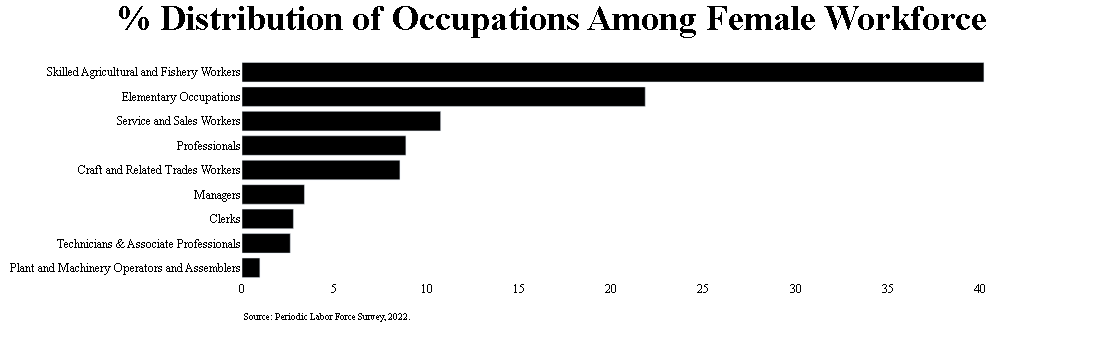

In [122]:
# creating a bar graph to visualize the % distribution of occupations
fig = px.bar(female_occupation, 
             x='Percentage', 
             y='Occupation', 
             orientation='h',
             color_discrete_sequence=['black'],
            category_orders={'Occupation': female_occupation['Occupation']})


# updating the layout
fig.update_layout(plot_bgcolor='white', paper_bgcolor="white",
                  title={'text': "<b>% Distribution of Occupations Among Female Workforce</b>", 'x':0.5, 
                         'xanchor': 'center', 'font': {'size': 36, 'family': "DM Serif Text"}},
                   xaxis_title=None,
                   yaxis_title=None,
                   font=dict(family="DM Serif Text", size=12, color="black"))


# adding a small footnote
fig.add_annotation(text="Source: Periodic Labor Force Survey, 2022.",
                   xref="paper", yref="paper",
                   x=0, y=-0.2,
                   showarrow=False,
                   font=dict(size=9))

# Show the figure
fig.show()

- 40% of the female workforce is engaged in the primary sector (agriculture, fishing, etc.)
- Female representation in the the top level occupations such as managers, clerks, and associate professionals is less than 5%.